In [2]:
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
datos_covid = pd.read_csv("datos_covid.csv")

datos_covid.drop(columns=["sexo", "grupo_edad", "num_hosp", "num_uci", "num_def"], inplace=True)
datos_covid["fecha"] = pd.to_datetime(datos_covid["fecha"], format="%Y-%m-%d")
datos_covid.head()

,provincia_iso,fecha,num_casos
0,A,2020-01-01,0
1,A,2020-01-01,0
2,A,2020-01-01,0
3,A,2020-01-01,0
4,A,2020-01-01,0


In [4]:

# Agrupar y sumar los casos de infectados
datos_covid_provincias = datos_covid.groupby(["provincia_iso", "fecha"]).agg({"num_casos": "sum"})

# Restablecer el índice para obtener las columnas "provincia_iso" y "fecha" en su propia columna
datos_covid_provincias = datos_covid_provincias.reset_index()


In [5]:
datos_covid_provincias.head()

,provincia_iso,fecha,num_casos
0,A,2020-01-01,0
1,A,2020-01-02,0
2,A,2020-01-03,0
3,A,2020-01-04,0
4,A,2020-01-05,0


In [6]:
provincias_iso = {
  "A": "Comunidad Valenciana",
  "AB": "Castilla La Mancha",
  "AL": "Andalucía",
  "AV": "Castilla y León",
  "B": "Cataluña",
  "BA": "Extremadura",
  "BI": "País Vasco",
  "BU": "Castilla y León",
  "C": "Galicia",
  "CA": "Andalucía",
  "CC": "Extremadura",
  "CE": "Ceuta",
  "CO": "Andalucía",
  "CR": "Castilla La Mancha",
  "CS": "Comunidad Valenciana",
  "CU": "Castilla La Mancha",
  "GC": "Canarias",
  "GI": "Cataluña",
  "GR": "Andalucía",
  "GU": "Castilla La Mancha",
  "H": "Andalucía",
  "HU": "Aragón",
  "J": "Andalucía",
  "L": "Cataluña",
  "LE": "Castilla y León",
  "LO": "La Rioja",
  "LU": "Galicia",
  "M": "Madrid",
  "MA": "Andalucía",
  "ML": "Melilla",
  "MU": "Región de Murcia",
  "NC": "Navarra",
  "O": "Asturias",
  "OR": "Galicia",
  "P": "Castilla y León",
  "PM": "Islas Baleares",
  "PO": "Galicia",
  "S": "Cantabria",
  "SA": "Castilla y León",
  "SE": "Andalucía",
  "SG": "Castilla y León",
  "SO": "Castilla y León",
  "SS": "País Vasco",
  "T": "Cataluña",
  "TE": "Aragón",
  "TF": "Canarias",
  "TO": "Castilla La Mancha",
  "V": "Comunidad Valenciana",
  "VA": "Castilla y León",
  "VI": "País Vasco",
  "Z": "Aragón",
  "ZA": "Castilla y León"
}

In [7]:
#datos_covid_comunidades = datos_covid_provincias.reset_index().replace({"provincia_iso": provincias_iso}).groupby(["provincia_iso", "fecha"]).sum()
datos_covid_comunidades = datos_covid_provincias.replace({"provincia_iso": provincias_iso}).groupby(["provincia_iso", "fecha"]).agg({"num_casos": "sum"})
datos_covid_comunidades = datos_covid_comunidades.reset_index()
datos_covid_comunidades.head()

,provincia_iso,fecha,num_casos
0,Andalucía,2020-01-01,0
1,Andalucía,2020-01-02,0
2,Andalucía,2020-01-03,0
3,Andalucía,2020-01-04,0
4,Andalucía,2020-01-05,0


In [8]:
datos_covid_comunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
provincia_iso    15523 non-null object
fecha            15523 non-null datetime64[ns]
num_casos        15523 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 363.9+ KB


In [9]:
#datos_covid_españa_group = datos_covid_comunidades.groupby("provincia_iso").sum()
#datos_covid_españa_group.head(17)

In [10]:
comunidades = [
    'Andalucía',
    'Aragón',
    'Asturias',
    'Canarias',
    'Cantabria',
    'Castilla La Mancha',
    'Castilla y León',
    'Cataluña',
    'Ceuta',
    'Comunidad Valenciana',
    'Extremadura',
    'Galicia',
    'Islas Baleares',
    'La Rioja',
    'Madrid',
    'Melilla',
    'Navarra',
    'País Vasco',
    'Región de Murcia'
]

In [11]:
madrid_data = datos_covid_comunidades.loc[datos_covid_comunidades["provincia_iso"] == "Navarra"]
datos_covid_comunidades["num_casos"].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [12]:
datos_covid_comunidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 3 columns):
provincia_iso    15523 non-null object
fecha            15523 non-null datetime64[ns]
num_casos        15523 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 363.9+ KB


In [13]:
madrid_data.head()

,provincia_iso,fecha,num_casos
13072,Navarra,2020-01-01,0
13073,Navarra,2020-01-02,0
13074,Navarra,2020-01-03,0
13075,Navarra,2020-01-04,0
13076,Navarra,2020-01-05,0


In [14]:

datos_covid_comunidades["num_casos"].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [15]:
madrid_data_semanas = madrid_data.groupby(madrid_data.index//7).agg({"fecha" : "max", "num_casos" : "sum"})

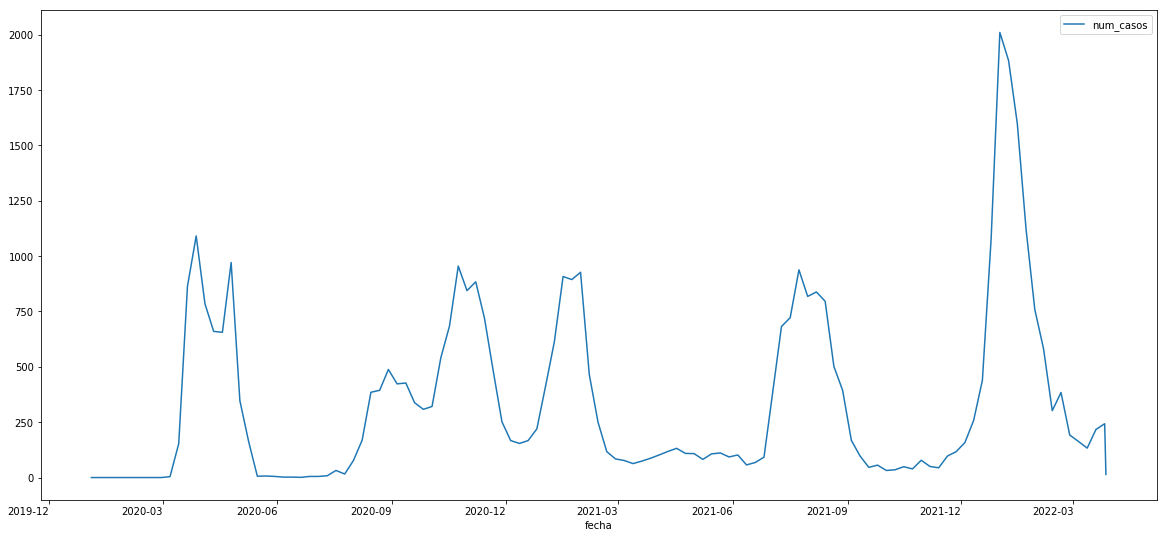

In [16]:
#Gráfica para Madrid agrupado por semanas

plt = madrid_data_semanas.plot(x="fecha", y="num_casos", figsize=(20, 10), rot=0)

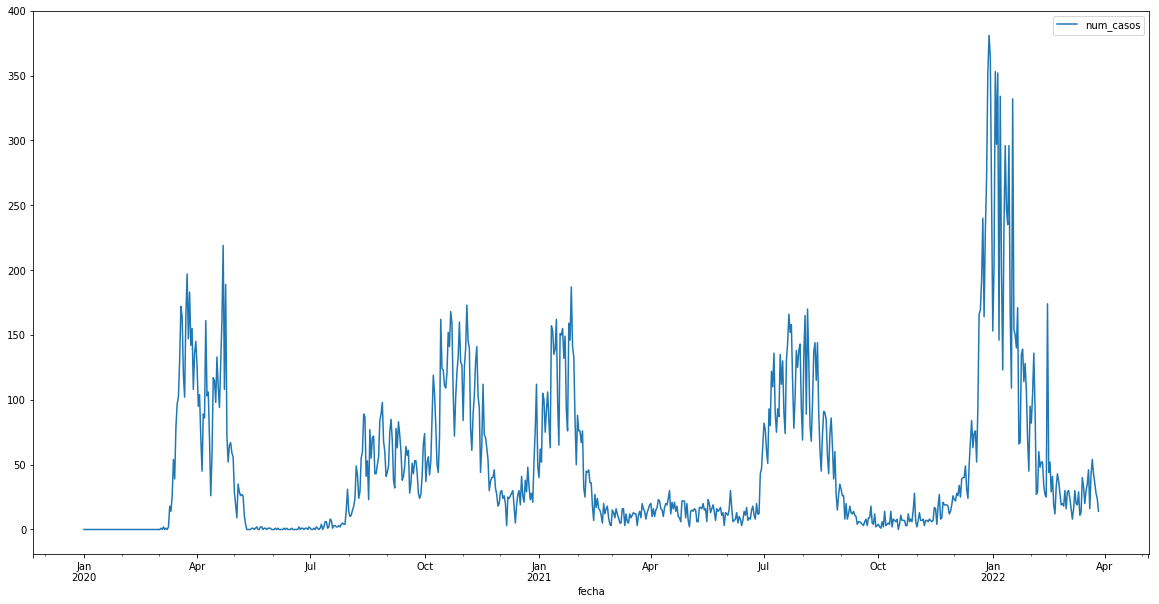

In [17]:
plt = madrid_data.plot(x="fecha", y="num_casos", figsize=(20, 10), rot=0)

C:\Users\joanb\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

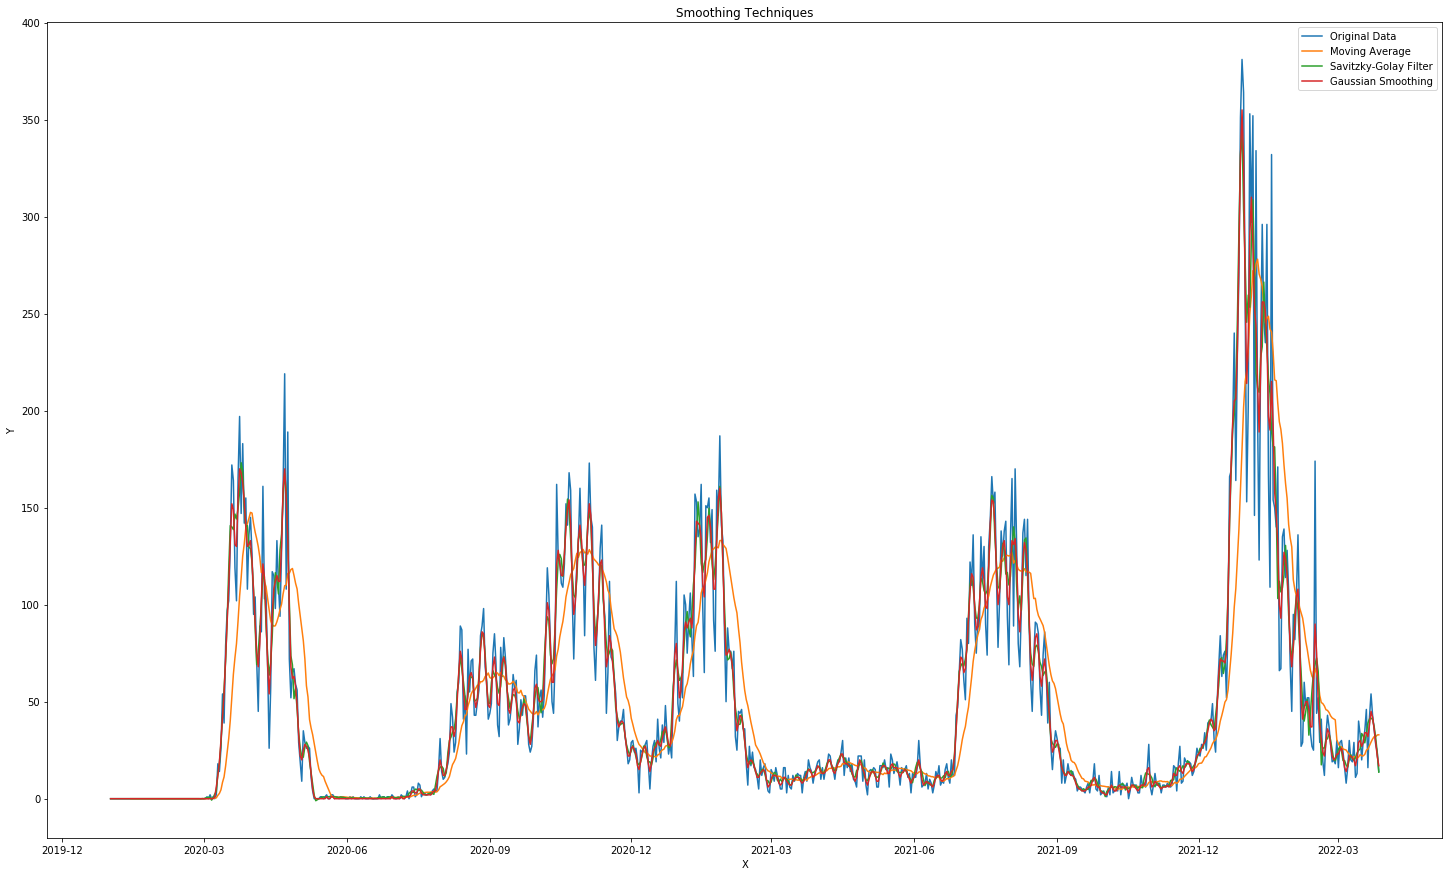

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter

# Generate some example data
x = madrid_data['fecha']
y = madrid_data['num_casos']

# Moving Average
window_size = 14
moving_avg = np.convolve(y, np.ones(window_size) / window_size, mode='valid')
madrid_data["moving_average"] = savgol_filter(y, window_length=9, polyorder=2)

# Savitzky-Golay Filter
smoothed_data = savgol_filter(y, window_length=9, polyorder=2)
madrid_data["Savitzky"] = savgol_filter(y, window_length=9, polyorder=2)
# Gaussian Smoothing
smoothed_array = gaussian_filter(y, sigma=1.0)
madrid_data["Gauss"] = gaussian_filter(y, sigma=1.0)
# Plot the original data and smoothed data
plt.figure(figsize=(25, 15))
plt.plot(x, y, label='Original Data')
plt.plot(x[window_size-1:], moving_avg, label='Moving Average')
plt.plot(x, smoothed_data, label='Savitzky-Golay Filter')
plt.plot(x, smoothed_array, label='Gaussian Smoothing')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smoothing Techniques')
plt.show()



C:\Users\joanb\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


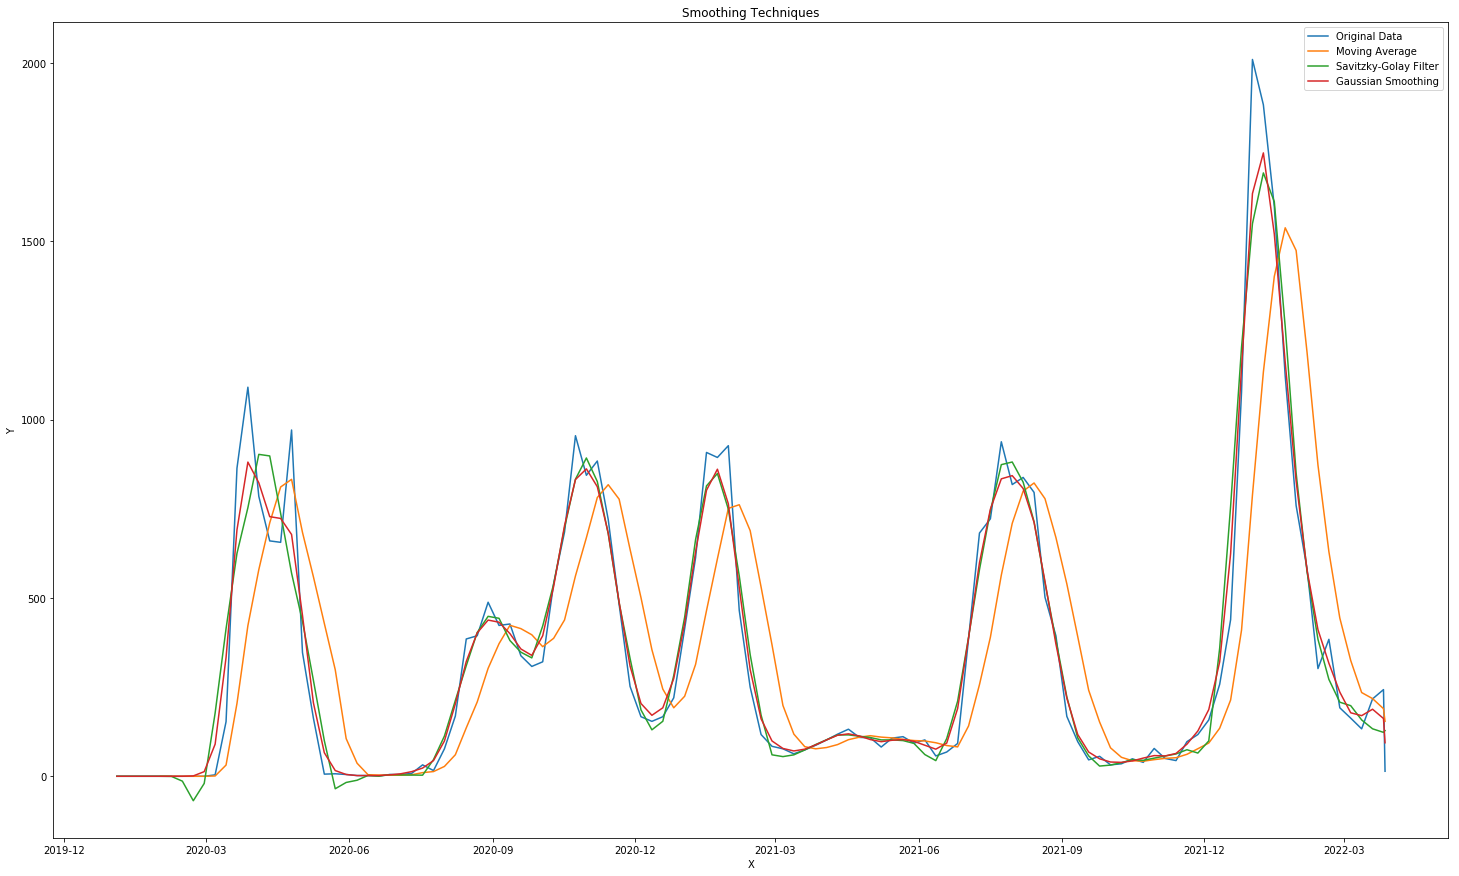

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter


x = madrid_data_semanas['fecha']
y = madrid_data_semanas['num_casos']

# Media Móvil
window_size = 5
moving_avg = np.convolve(y, np.ones(window_size) / window_size, mode='valid')

# Savitzky-Golay Filter
smoothed_data = savgol_filter(y, window_length=9, polyorder=2)

# Gaussian Smoothing
smoothed_array = gaussian_filter(y, sigma=1.0)

# Plot the original data and smoothed data
plt.figure(figsize=(25, 15))
plt.plot(x, y, label='Original Data')
plt.plot(x[window_size-1:], moving_avg, label='Moving Average')
plt.plot(x, smoothed_data, label='Savitzky-Golay Filter')
plt.plot(x, smoothed_array, label='Gaussian Smoothing')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smoothing Techniques')
plt.show()

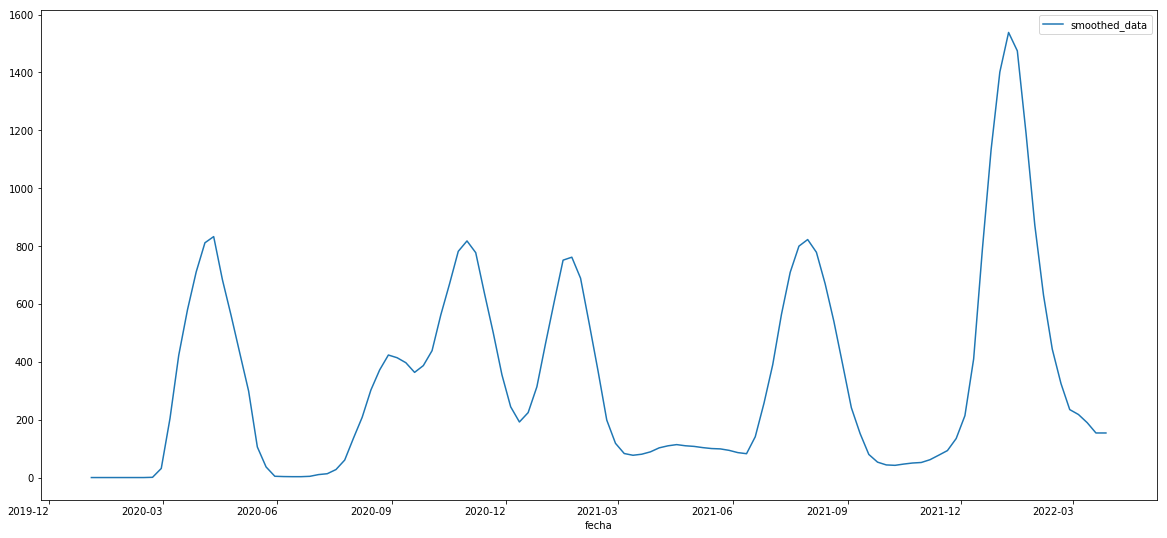

In [20]:
window_size = 5

madrid_data_semanas['smoothed_data'] = madrid_data_semanas['num_casos'].rolling(window_size, center=True).mean() 

madrid_data_semanas['smoothed_data'].fillna(method='bfill', inplace=True)
madrid_data_semanas['smoothed_data'].fillna(method='ffill', inplace=True)

plt = madrid_data_semanas.plot(x="fecha", y="smoothed_data", figsize=(20, 10), rot=0)

C:\Users\joanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\joanb\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


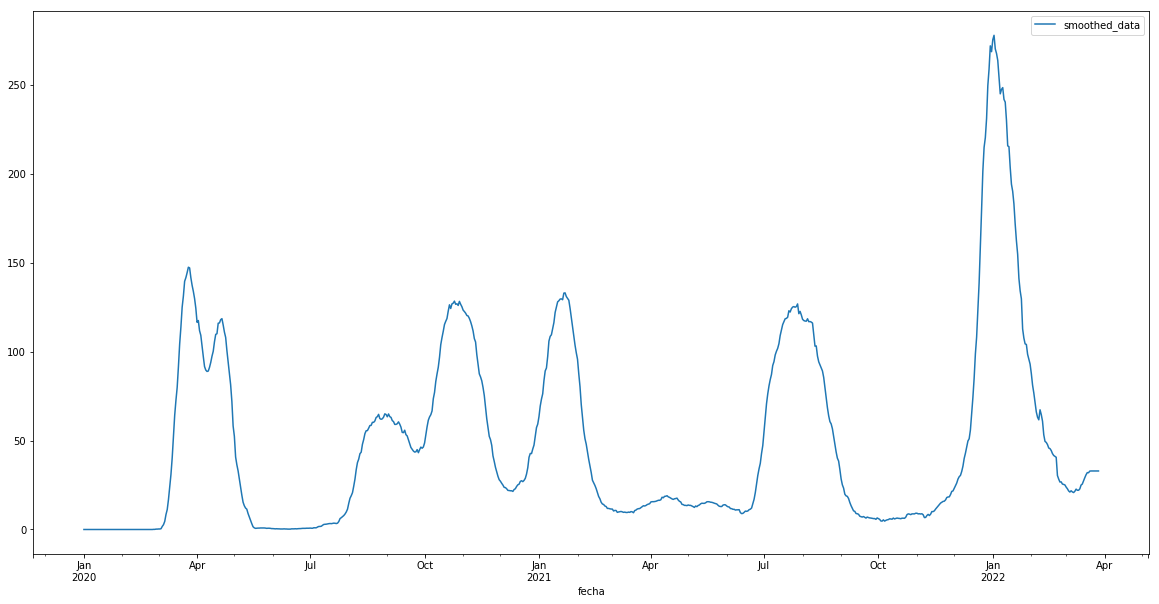

In [21]:
window_size = 14  # Adjust the window size according to your preference


madrid_data['smoothed_data'] = madrid_data['num_casos'].rolling(window_size, center=True).mean()


madrid_data['smoothed_data'].fillna(method='bfill', inplace=True)
madrid_data['smoothed_data'].fillna(method='ffill', inplace=True)



from scipy.ndimage.filters import uniform_filter1d

# Comento el segundo modelo porque usa el mismo método de "suavizado" que el smoothed_data (media móvil)
#madrid_data['smoothed_data_1d'] = uniform_filter1d(madrid_data['num_casos'], size = window_size)

plt = madrid_data.plot(x="fecha", y="smoothed_data", figsize=(20, 10), rot=0)
#plt = madrid_data.plot(x="fecha", y="smoothed_data_1d", figsize=(20, 10), rot=0)

In [22]:
madrid_data.head(20)

,provincia_iso,fecha,num_casos,moving_average,Savitzky,Gauss,smoothed_data
13072,Navarra,2020-01-01,0,0.0,0.0,0,0.0
13073,Navarra,2020-01-02,0,0.0,0.0,0,0.0
13074,Navarra,2020-01-03,0,0.0,0.0,0,0.0
13075,Navarra,2020-01-04,0,0.0,0.0,0,0.0
13076,Navarra,2020-01-05,0,0.0,0.0,0,0.0
13077,Navarra,2020-01-06,0,0.0,0.0,0,0.0
13078,Navarra,2020-01-07,0,0.0,0.0,0,0.0
13079,Navarra,2020-01-08,0,0.0,0.0,0,0.0
13080,Navarra,2020-01-09,0,0.0,0.0,0,0.0
13081,Navarra,2020-01-10,0,0.0,0.0,0,0.0


In [23]:
datos_covid_pais = datos_covid_comunidades.groupby("fecha").sum()

datos_covid_pais = datos_covid_pais.reset_index()

datos_covid_pais = datos_covid_pais.groupby(datos_covid_pais.index//7).agg({"fecha" : "max", "num_casos" : "sum"})

datos_covid_pais

,fecha,num_casos
0,2020-01-07,0
1,2020-01-14,2
2,2020-01-21,2
3,2020-01-28,0
4,2020-02-04,1
5,2020-02-11,1
6,2020-02-18,3
7,2020-02-25,7
8,2020-03-03,262
9,2020-03-10,2860


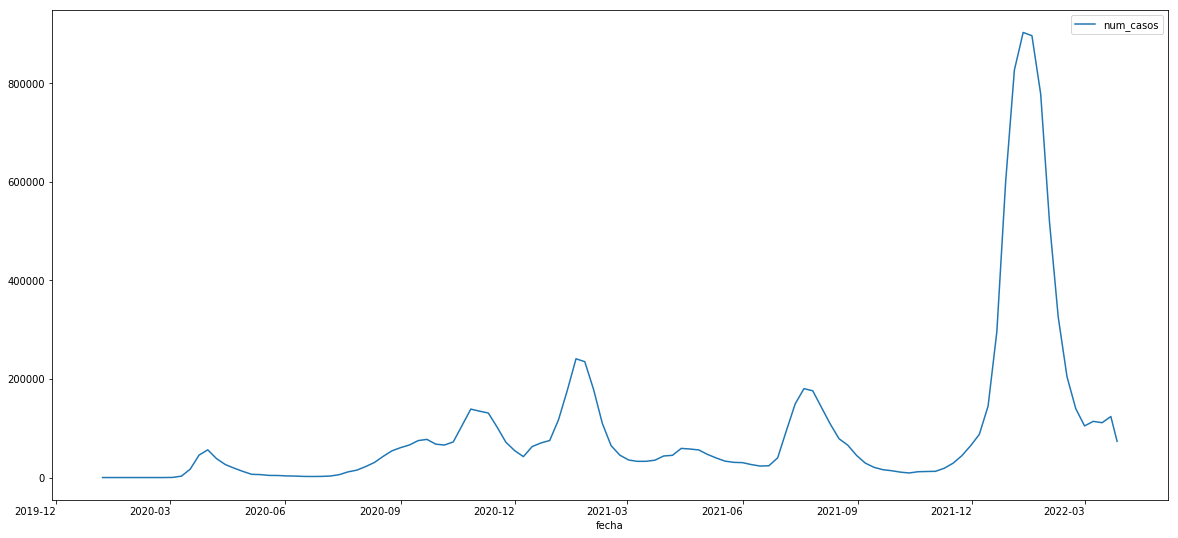

In [24]:
plt = datos_covid_pais.plot(x="fecha", y="num_casos", figsize=(20, 10), rot=0)

In [25]:
datos_covid_comunidades.to_csv("datos_covid_comunidades.csv")

In [26]:
poblaciones = pd.read_csv("poblaciones_comunidades.csv", sep=";", encoding="latin-1")
poblaciones.drop(columns=["Sexo", "Nacional"], inplace=True)
poblaciones["Comunidades y Ciudades Autónomas"] = poblaciones["Comunidades y Ciudades Autónomas"].str[3:]
poblaciones.rename(columns={"Comunidades y Ciudades Autónomas": "comunidad", "Periodo": "fecha", "Total":"poblacion"}, inplace=True)
poblaciones["poblacion"] = pd.to_numeric(poblaciones["poblacion"].str.replace(".", ""))

poblaciones.head(40)


,comunidad,fecha,poblacion
0,Andalucía,2021,8472407
1,Andalucía,2020,8464411
2,Aragón,2021,1326261
3,Aragón,2020,1329391
4,"Asturias, Principado de",2021,1011792
5,"Asturias, Principado de",2020,1018784
6,"Balears, Illes",2021,1173008
7,"Balears, Illes",2020,1171543
8,Canarias,2021,2172944
9,Canarias,2020,2175952


In [27]:
#Esto es para ver el día en que Madrid tiene casos que aumentan de forma constante 
# (en el primer caso al día siguiente hay 0 infectados y el modelo no funciona bien por eso)
madrid_data.head(60) 

,provincia_iso,fecha,num_casos,moving_average,Savitzky,Gauss,smoothed_data
13072,Navarra,2020-01-01,0,0.000000,0.000000,0,0.000000
13073,Navarra,2020-01-02,0,0.000000,0.000000,0,0.000000
13074,Navarra,2020-01-03,0,0.000000,0.000000,0,0.000000
13075,Navarra,2020-01-04,0,0.000000,0.000000,0,0.000000
13076,Navarra,2020-01-05,0,0.000000,0.000000,0,0.000000
13077,Navarra,2020-01-06,0,0.000000,0.000000,0,0.000000
13078,Navarra,2020-01-07,0,0.000000,0.000000,0,0.000000
13079,Navarra,2020-01-08,0,0.000000,0.000000,0,0.000000
13080,Navarra,2020-01-09,0,0.000000,0.000000,0,0.000000
13081,Navarra,2020-01-10,0,0.000000,0.000000,0,0.000000


### Primer Modelo:

119
119
[ 1.00000000e+00  4.30253339e-02  1.85118016e-03  7.96466601e-05
  3.42677362e-06  1.47832066e-07  6.26580576e-09  1.39350024e-10
 -3.50513437e-10 -1.73041427e-10 -4.48461167e-11 -4.05158695e-11
 -3.61856223e-11 -3.18553751e-11 -2.75251279e-11 -2.31948807e-11
 -1.88646334e-11 -1.45343862e-11 -1.02041390e-11 -5.87389181e-12
 -1.54364460e-12 -1.24993236e-12 -1.11834093e-12 -9.86749492e-13
 -8.55158058e-13 -7.23566624e-13 -5.91975190e-13 -4.60383756e-13
 -3.28792322e-13 -1.97200888e-13 -6.56094540e-14 -4.14917390e-14
 -4.10806035e-14 -4.06694681e-14 -4.02583326e-14 -3.98471971e-14
 -3.94360617e-14 -3.90249262e-14 -3.86137907e-14 -3.82026553e-14
 -3.77915198e-14 -3.73803843e-14 -3.69692489e-14 -3.65581134e-14
 -3.61469779e-14 -3.57358425e-14 -3.53247070e-14 -3.49135716e-14
 -3.45024361e-14 -3.40913006e-14 -3.36801652e-14 -3.32690297e-14
 -3.28578942e-14 -3.24467588e-14 -3.20356233e-14 -3.16244878e-14
 -3.12133524e-14 -3.08022169e-14 -3.03910815e-14 -2.99799460e-14
 -2.95688105e-14 

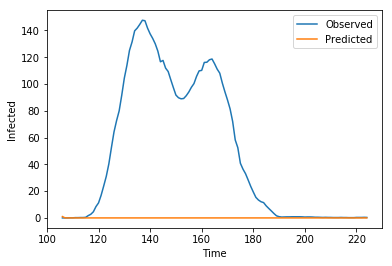

Estimated Parameters:
Infection Rate (beta): -2.2464459893988145
Recovery Rate (gamma): 0.8995202956171362


In [28]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#PRIMERA OLA EN MADRID

# Definimos la ecuaciones del modelo SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]



# Condiciones iniciales
N  = poblaciones.loc[(poblaciones['comunidad'] == 'Madrid, Comunidad de') & (poblaciones['fecha'] == 2020), 'poblacion'].values[0]  # Población total Comunidad de Madrid 2020
I0 = 1  # Numero de infectados inicialmente
R0 = 0  # Numero de recuperados inicialmente
initial_conditions = [N - I0, I0, R0]  # Valores S, I, R iniciales
data = madrid_data['smoothed_data']  # Datos reales de los infectados, con el filtro de suavizado.

# Convertimos el tiempo a dias.
reference_date = pd.Timestamp(madrid_data['fecha'].min())  
time = (madrid_data['fecha'] - reference_date).dt.days.astype(float)

# Selecionamos los días donde empiezan a haber casos en Madrid de forma continua (22 de Febrero) 
# y terminamos en el final de la primera ola, el 21 de Junio(dia 171)

start_day = 53
end_day = 171
selected_data = data[(time >= start_day) & (time <= end_day)]
#print("selected_data")
#print(selected_data)
selected_time = time[(time >= start_day) & (time <= end_day)]
#print("selected_time")
#print(selected_time)
# Establecemos las cotas para la beta y la gamma
#bounds = [(0, 10), (0, 1)]  , bounds=bounds


print(len(selected_data))
print(len(selected_time))

# Definimos la función objective (suma del errores cuadráticos)
def objective(params):
    beta, gamma = params
    y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta, gamma))
    return np.sum((y_pred[:, 1] - selected_data) ** 2)

# Optimización
result = minimize(objective, x0=[0.5, 0.1])
estimated_params = result.x
beta_est, gamma_est = estimated_params

# Simulamos el modelo SIR con los Datos iniciales
y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta_est, gamma_est))

print(y_pred[:, 1])

# Comparamos los datos reales con los predecidos
plt.plot(selected_time + start_day, selected_data, label='Observed')  
plt.plot(selected_time + start_day, y_pred[:, 1], label='Predicted')  
plt.xlabel('Time')
plt.ylabel('Infected')
plt.legend()
plt.show()

print("Estimated Parameters:")
print("Infection Rate (beta):", beta_est)
print("Recovery Rate (gamma):", gamma_est)


In [29]:
print(selected_data)
print(selected_time)
print(data)
print(time)

13125      0.000000
13126      0.000000
13127      0.000000
13128      0.071429
13129      0.071429
13130      0.214286
13131      0.214286
13132      0.285714
13133      0.285714
13134      0.428571
13135      1.714286
13136      2.714286
13137      4.571429
13138      8.428571
13139     11.214286
13140     16.857143
13141     23.785714
13142     31.000000
13143     40.357143
13144     52.500000
13145     64.214286
13146     72.642857
13147     79.928571
13148     91.571429
13149    104.357143
13150    113.857143
13151    125.071429
13152    131.357143
13153    139.642857
13154    141.714286
            ...    
13214      0.857143
13215      0.857143
13216      0.857143
13217      0.857143
13218      0.785714
13219      0.642857
13220      0.714286
13221      0.714286
13222      0.642857
13223      0.500000
13224      0.500000
13225      0.428571
13226      0.357143
13227      0.428571
13228      0.357143
13229      0.357143
13230      0.285714
13231      0.285714
13232      0.285714


## Modelo para semanas

voy a intentar aplicar el modelo a las semanas que los datos sonmás sencillos

In [30]:
madrid_data_semanas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1867 to 1984
Data columns (total 3 columns):
fecha            118 non-null datetime64[ns]
num_casos        118 non-null int64
smoothed_data    118 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.7 KB


In [31]:
madrid_data_semanas.head(10)

,fecha,num_casos,smoothed_data
1867,2020-01-04,0,0.0
1868,2020-01-11,0,0.0
1869,2020-01-18,0,0.0
1870,2020-01-25,0,0.0
1871,2020-02-01,0,0.0
1872,2020-02-08,0,0.0
1873,2020-02-15,0,0.0
1874,2020-02-22,0,0.8
1875,2020-02-29,0,31.4
1876,2020-03-07,4,204.2


selected data:
[8.000e-01 3.140e+01 2.042e+02 4.224e+02 5.794e+02 7.106e+02 8.112e+02
 8.326e+02 6.838e+02 5.594e+02 4.286e+02 2.988e+02 1.056e+02 3.660e+01
 4.400e+00 3.400e+00 3.000e+00 3.000e+00]
selected time:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
125
[832.6000000000001, 350.79512678923834, 133.43989246865976, 48.79429478853633, 17.58501801768306, 6.304308915809896, 2.255870832007086, 0.8066730409630715, 0.2883875577946777, 0.10309031059106218, 0.03685177143436308, 0.0131729905031781, 0.004708638164105735, 0.0016830201289783722, 0.0006010299026369228, 0.00021519926965885046, 7.746928196092291e-05, 2.7139581707223493e-05, 9.490508345441754e-06, 3.5466557894708045e-06, 1.3243048278458151e-06, 4.882014526325549e-07, -4.2411364252454324e-08, -3.411435666263663e-07, -3.386469164596149e-07, -2.9756389284747325e-07, -2.96793849292129e-07, -2.1946610461538526e-07, -1.3478406027056657e-07, -9.751466787238236e-08, -6.024527547419812e-08, -3.583317133939837e-08, -3.471156158

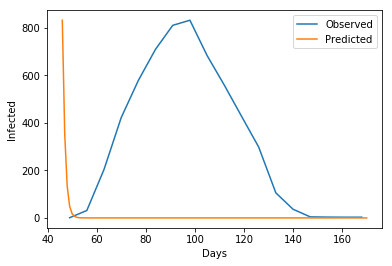

Estimated Parameters:
Infection Rate (beta): 388.3677018491341
Recovery Rate (gamma): 389.1431575838087


In [44]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#PRIMERA OLA EN MADRID

# Definimos la ecuaciones del modelo SIR
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]



# Condiciones iniciales
N = 661197  # Población total Comunidad de Madrid 2020  # Población total Comunidad de Madrid 2020
I0 = 1  # Numero de infectados inicialmente
R0 = 0  # Numero de recuperados inicialmente
initial_conditions = [N - I0, I0, R0]  # Valores S, I, R iniciales
data = madrid_data_semanas['smoothed_data']  # Datos reales de los infectados, con el filtro de suavizado.
data = data.values
# Convertimos el tiempo a dias.
reference_date = pd.Timestamp(madrid_data_semanas['fecha'].min())  
time = (madrid_data_semanas['fecha'] - reference_date).dt.days.astype(float)
time = time.values


# Selecionamos los días donde empiezan a haber casos en Madrid de forma continua (5 de Febrero) 

# y terminamos en el final de la primera ola, el 21 de Junio(dia 171)

start_day = 31+15
end_day = 171
selected_data = data[(time >= start_day) & (time <= end_day)]
selected_time = np.arange(len(selected_data))
print("selected data:")
print(selected_data)
print("selected time:")
print( selected_time)

time_total = end_day - start_day
print(time_total)

# Establecemos las cotas para la beta y la gamma
#bounds = [(0, 10), (0, 1)]  , bounds=bounds

# Definimos la función objective (suma de errores cuadráticos)
def objective(params):
    beta, gamma = params
    y_pred = odeint(sir_model, initial_conditions, selected_time, args=(beta, gamma))
    return np.sum((y_pred[:, 1] - selected_data) ** 2)


# Optimización
result = minimize(objective, x0=[0.5, 0.1])
estimated_params = result.x
beta_est, gamma_est = estimated_params

# Simulamos el modelo SIR con los Datos iniciales
y_pred = odeint(sir_model, initial_conditions, range(start_day,end_day), args=(beta_est, gamma_est))


y_pred_values = y_pred[:,1]
y_pred_values = [i/(max(y_pred_values)/max(selected_data)) for i in y_pred_values]

print(y_pred_values)
rango = range(start_day,end_day)
print(rango)
# Comparamos los datos reales con los predecidos
plt.plot(time[(time >= start_day) & (time <= end_day)], selected_data, label='Observed')  
plt.plot(range(start_day,end_day), y_pred_values, label='Predicted')  
plt.xlabel('Days')
plt.ylabel('Infected')
plt.legend()
plt.show()


print("Estimated Parameters:")
print("Infection Rate (beta):", beta_est)
print("Recovery Rate (gamma):", gamma_est)

### Segundo modelo:



In [32]:
# Condiciones iniciales
N = 6779888  # Población total Comunidad de Madrid 2020
I0 = 1  # Numero de infectados inicialmente
R0 = 0  # Numero de recuperados inicialmente
initial_conditions = [N - I0, I0, R0]  # Valores S, I, R iniciales
data = madrid_data['smoothed_data']  # Datos reales de los infectados, con el filtro de suavizado.

# Convertimos el tiempo a dias.
reference_date = pd.Timestamp(madrid_data['fecha'].min())  
time = (madrid_data['fecha'] - reference_date).dt.days.astype(float)


# Selecionamos los días donde empiezan a haber casos en Madrid de forma continua (26 de Febrero) y terminamos en el final de
# la primera ola, el 21 de Junio(dia 171)
start_day = 57
end_day = 171
selected_data = data[(time >= start_day) & (time <= end_day)]
selected_time = time[(time >= start_day) & (time <= end_day)]

In [33]:
import numpy as np
from scipy.optimize import minimize

data = np.copy(selected_data)

def sir_model(params, t):
    beta, gamma = params
    I = np.zeros(len(t))
    I[0] = data[0] 

    for i in range(1, len(t)):
        dIdt = (beta * I[i-1] * (sum(data) - I[i-1])) - (gamma * I[i-1])
        I[i] = I[i-1] + dIdt

    return I

def objective(params):
    predicted = sir_model(params, t)
    return np.sum((data - predicted) ** 2)

initial_params = [0.5, 0.1]
t = np.arange(len(data))

result = minimize(objective, initial_params, method='Nelder-Mead')
optimized_params = result.x

print("Optimized Parameters:")
print("Beta:", optimized_params[0])
print("Gamma:", optimized_params[1])

predicted = sir_model(optimized_params, t)




C:\Users\gonibix23\AppData\Local\Temp\ipykernel_7780\2376591827.py:12: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = (beta * I[i-1] * (sum(data) - I[i-1])) - (gamma * I[i-1])
C:\Users\gonibix23\AppData\Local\Temp\ipykernel_7780\2376591827.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  dIdt = (beta * I[i-1] * (sum(data) - I[i-1])) - (gamma * I[i-1])
C:\Users\gonibix23\AppData\Local\Temp\ipykernel_7780\2376591827.py:19: RuntimeWarning: overflow encountered in square
  return np.sum((data - predicted) ** 2)


Optimized Parameters:
Beta: 0.5
Gamma: 0.1


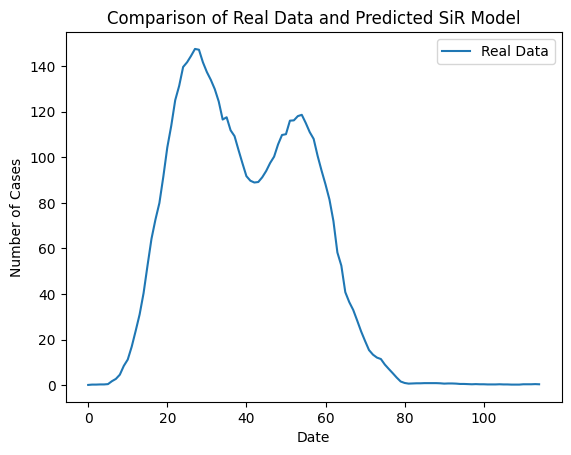

In [34]:
# Plot the real data and the predicted values
plt.plot(t, data, label='Real Data')
#plt.plot(t, predicted, label='Predicted Model') #ESTO ESTA COMENTADO POQUE EL MODELO PREDECIDO QUE SACA ES MALÍSIMO

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Comparison of Real Data and Predicted SiR Model')

# Add a legend
plt.legend()

# Display the plot
plt.show()